<a href="https://colab.research.google.com/github/DevuP1506/Codsoft-internship-Tasks/blob/main/Customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CUSTOMER CHURN PREDICTION.**

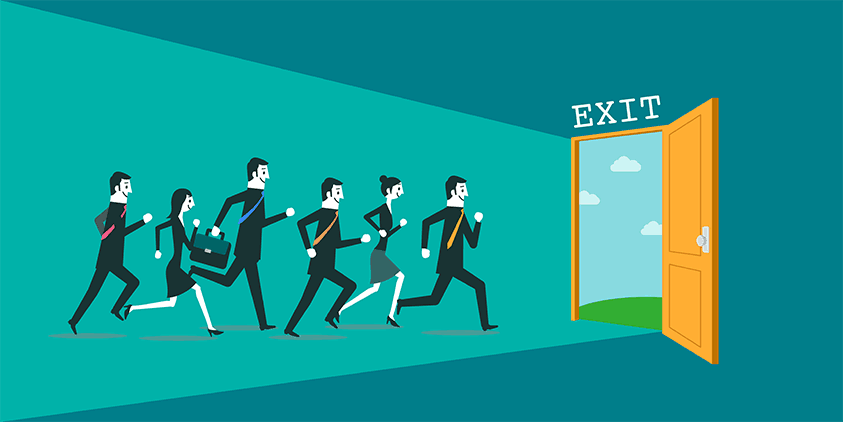

### **CONTENT OVERVIEW.**



## 1.   Introduction.
## 2.   Data Inspection.
## 3.   Data Visualization.
## 4.   Data Preprocessing.
## 5.   Predictive Analytics.
## 6.   Conclusion.





## **1.INTRODUCTION.**

Customer churn prediction is a crucial task for businesses across various industries, including telecommunications, banking, e-commerce, and subscription-based services. It involves predicting which customers are likely to stop using a company's products or services in the future. By identifying and understanding the factors that lead to customer churn, businesses can take proactive measures to retain customers and improve customer satisfaction.

Customer churn prediction is a pivotal application of machine learning in the banking sector, aimed at predicting which customers are likely to leave the bank's services. This predictive analytics process involves analyzing historical customer data to identify patterns and factors that indicate potential churn.

The dataset used for Customer churn predictionis sourced from Kaggle which typically includes various customer attributes, transaction histories, account activities.
Machine learning algorithms, including logistic regression, random forests, and gradient boosting, are used to build predictive models. These models are trained on historical data to predict the likelihood of churn for new customers.

By accurately predicting churn, businesses can take proactive measures to retain customers, such as offering personalized incentives, improving customer service, or providing targeted marketing campaigns.

### Importing necessary libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score
from sklearn.metrics import classification_report

In [ ]:
#Load data
df=pd.read_csv('/content/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## **2. DATA EXPLORATION.**

In [ ]:
#Get the first five rows
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#Get the last five rows
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
#Get the shape of data
df.shape

(10000, 14)

In [ ]:
#Get the information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
#Get a quick statistical description about data.
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
#Check for the null values
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## **3. DATA VISUALIZATION.**

Before Visualization,Check for outliers and remove it from dataframe.

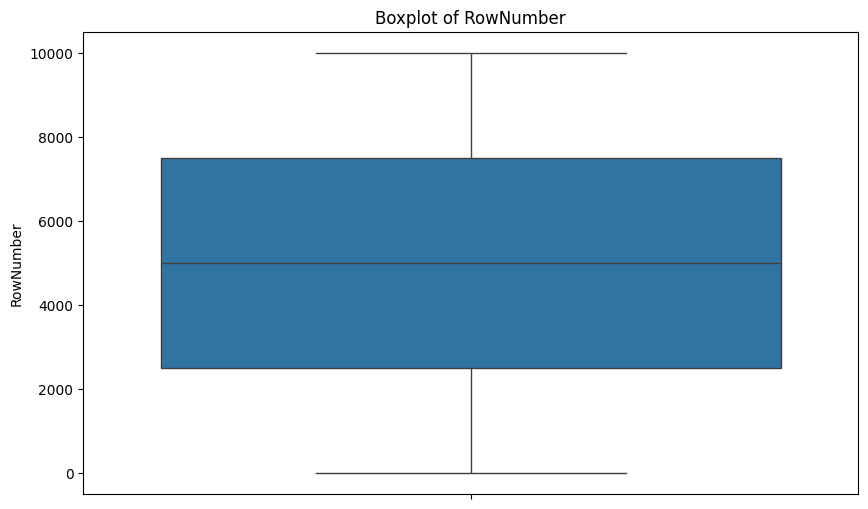

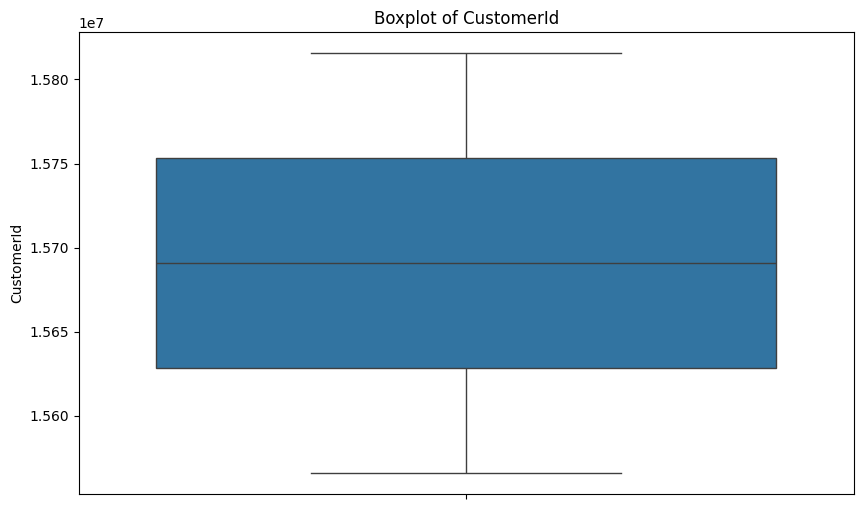

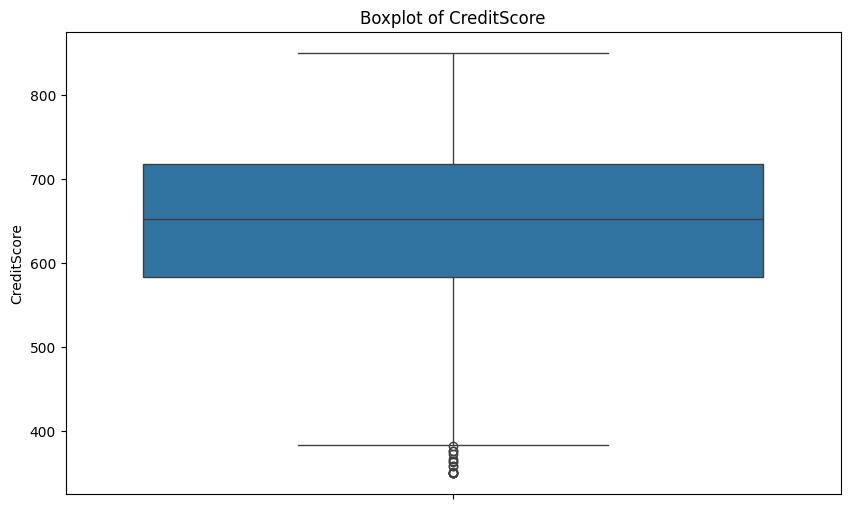

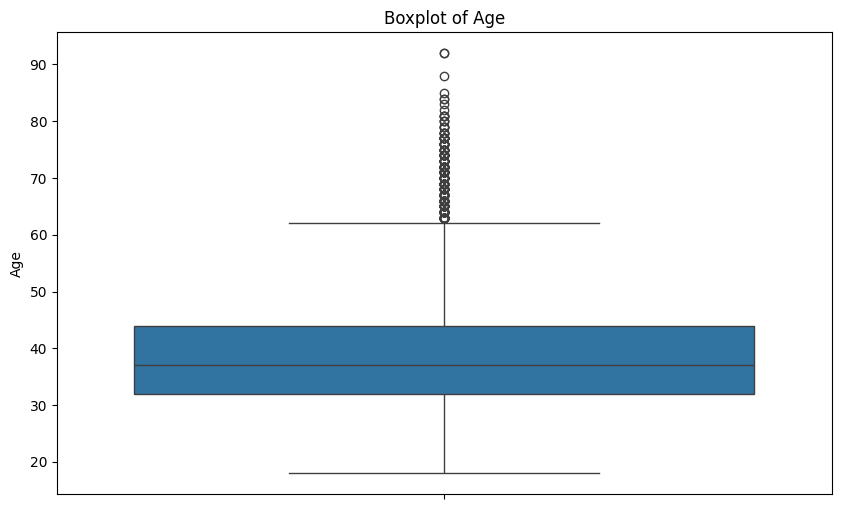

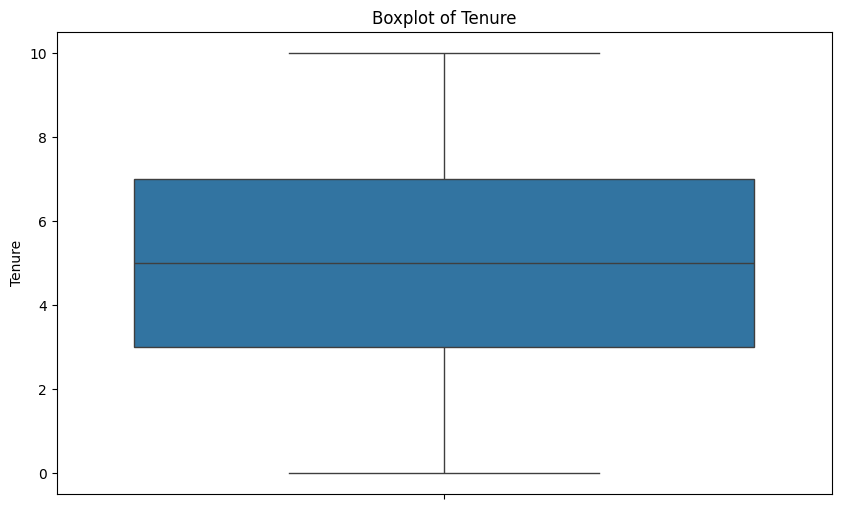

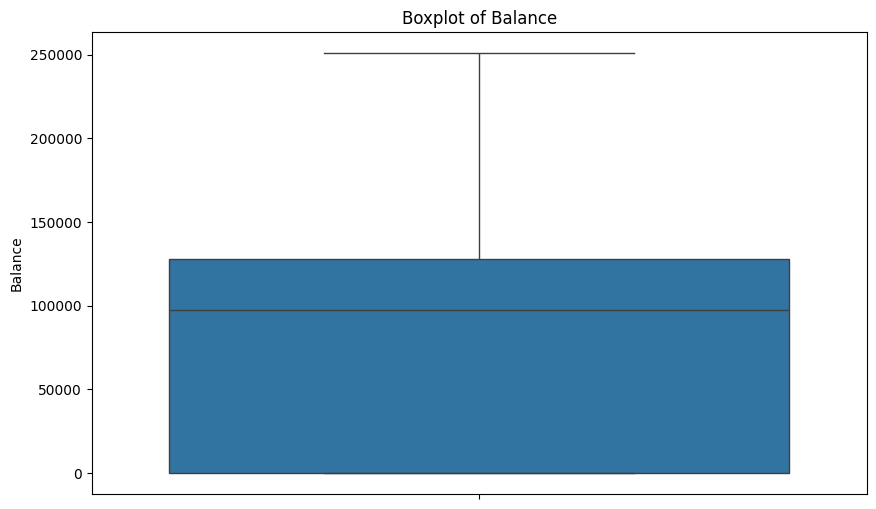

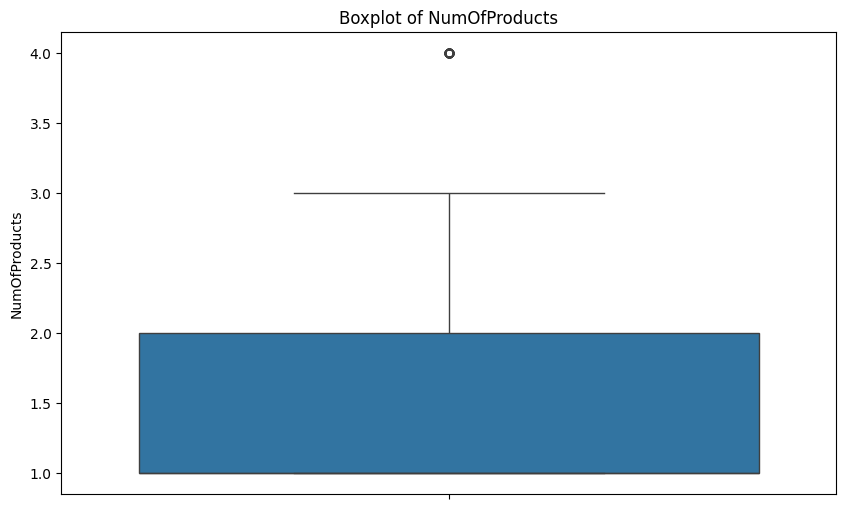

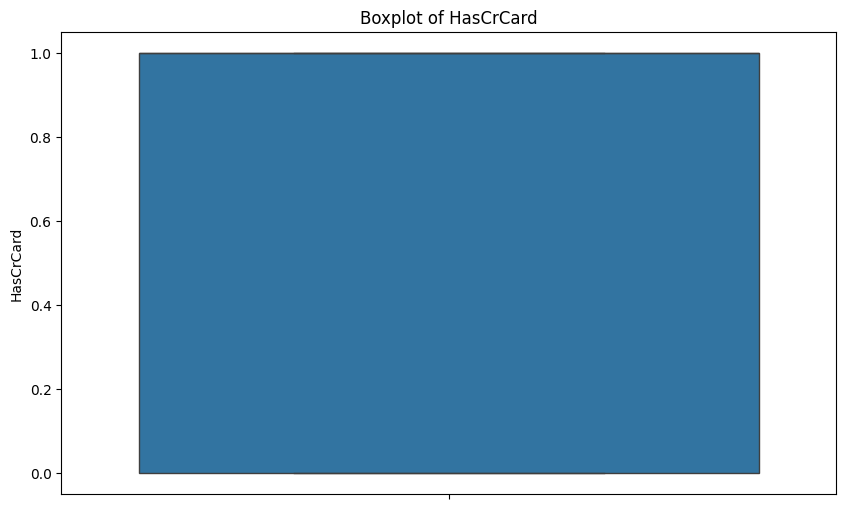

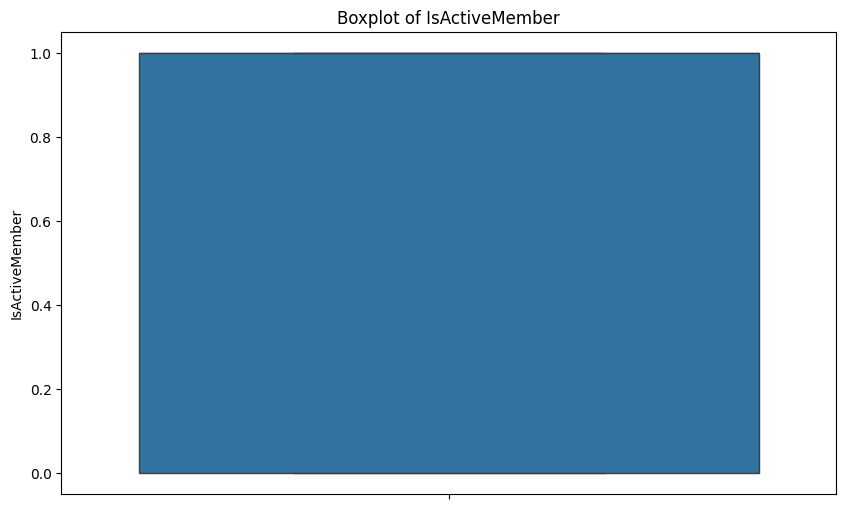

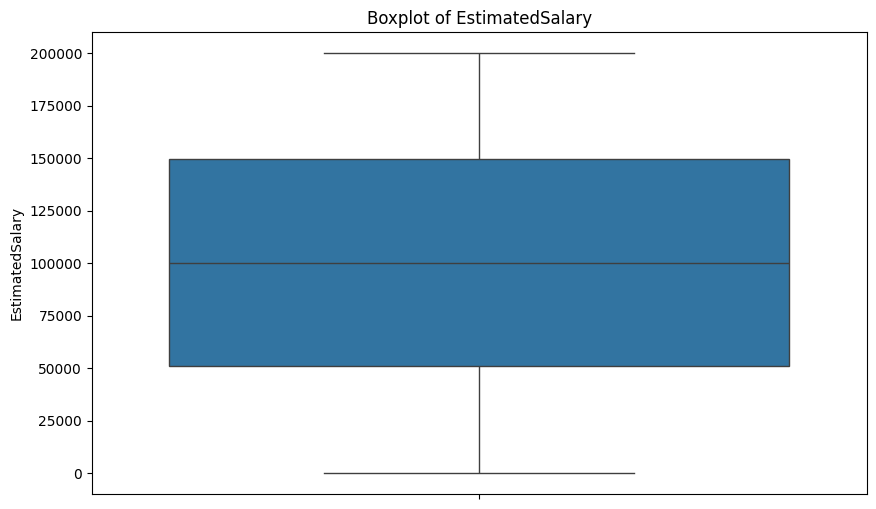

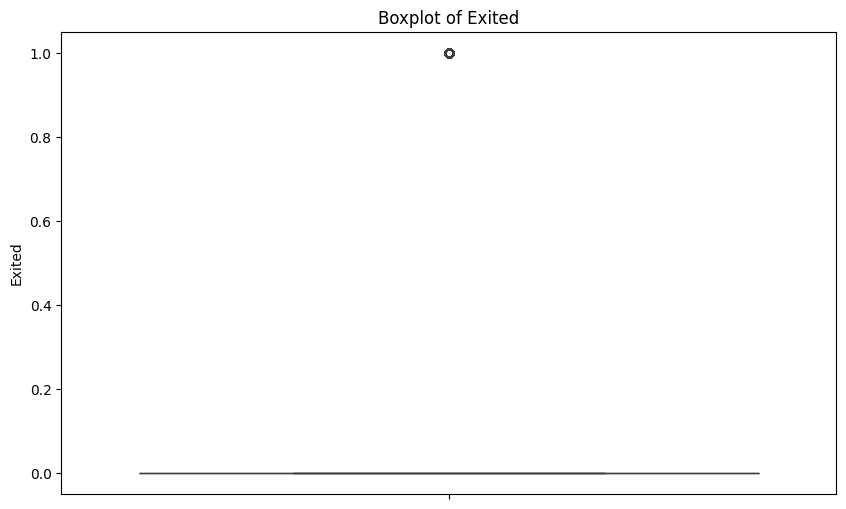

In [ ]:

# Selecting numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Creating boxplots for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, y=column)
    plt.title(f'Boxplot of {column}')
    plt.show()


As we can see Age and CreditScore has outliers.


In [ ]:
#Removing outliers in Age Column
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
df1 = df.loc[(df['Age']>=lower_bound)&(df['Age']<=upper_bound)]

#Display the cleaned dataframe
print("Cleaned dataframe:")
df1
df1.reset_index(drop=True,inplace=False)

Cleaned dataframe:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9636,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9637,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9638,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9639,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
#Removing Outliers in CreditScore column
Q1 = df1['CreditScore'].quantile(0.25)
Q3 = df1['CreditScore'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
df2 = df1.loc[(df1['CreditScore']>=lower_bound)&(df1['CreditScore']<=upper_bound)]

#Display the cleaned dataframe
print("Cleaned dataframe:")
df2
df2.reset_index(drop=True,inplace=False)

Cleaned dataframe:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9622,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9623,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9624,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9625,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
#Get the shape of cleaned dataframe
df2.shape

(9627, 14)

## Analysis for target variable('Exited')

In [ ]:
exited_count=df2['Exited'].value_counts()
exited_count

0    7677
1    1950
Name: Exited, dtype: int64

In [ ]:
#PieChart
pie_chart = px.pie(exited_count,
                  values=exited_count.values,
                  names=exited_count.index,
                  color=exited_count.index,
                  title='Distribution of Target variable',
                  labels={'values': 'Frequency', 'names': 'Exited'},
                       hole=.4,)
# Adding text labels
pie_chart.update_traces(textinfo='label+percent', pull=[0.1, 0.1, 0.1, 0.1, 0.1])

# Customizing layout
pie_chart.update_layout(font=dict(size=14, color="black"), height=500,template='plotly',)

pie_chart.show()

## Distribution of Geography.

In [ ]:
df2['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
geography_count=df2['Geography'].value_counts()
geography_count

France     4826
Germany    2421
Spain      2380
Name: Geography, dtype: int64

In [ ]:
geography = px.histogram(df2,x='Geography')
geography.show()

<Axes: xlabel='Geography', ylabel='count'>

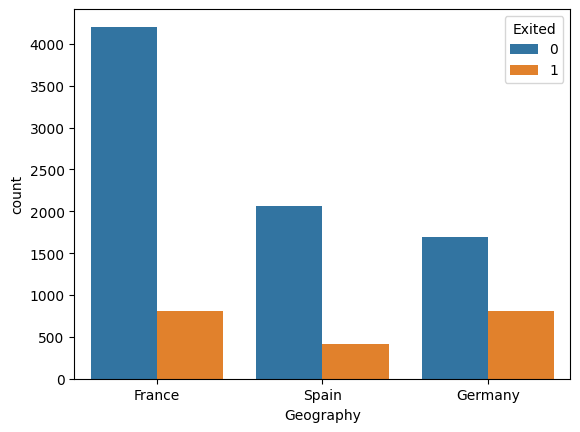

In [ ]:
sns.countplot(x='Geography',data=df,hue='Exited')

Output Evaluation:Maximum churn occurs in France and Germany.

## Gender Analysis.

In [ ]:
gender_count=df2['Gender'].value_counts()
gender_count

Male      5259
Female    4368
Name: Gender, dtype: int64

In [ ]:
funnel_chart_area=px.funnel_area(gender_count,gender_count.index,gender_count.values,
                                 title='Gender Distribution')
funnel_chart_area.show()

<Axes: xlabel='Gender', ylabel='count'>

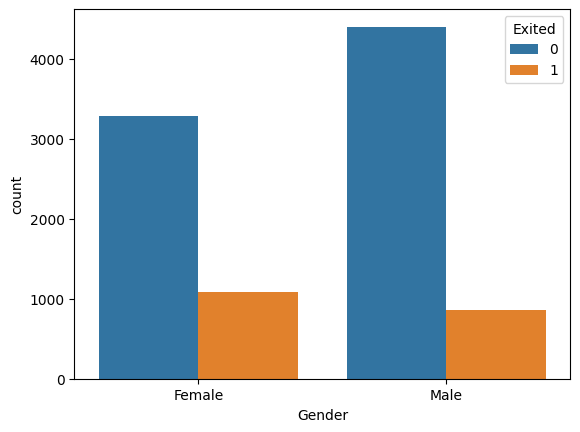

In [ ]:
sns.countplot(x='Gender',data=df2,hue='Exited')

Female Customer has exited more than the male customer.

### Analysis of whether the customer is active or not.

In [ ]:
active_count=df2['IsActiveMember'].value_counts()
active_count

1    4848
0    4779
Name: IsActiveMember, dtype: int64

<Axes: xlabel='IsActiveMember', ylabel='count'>

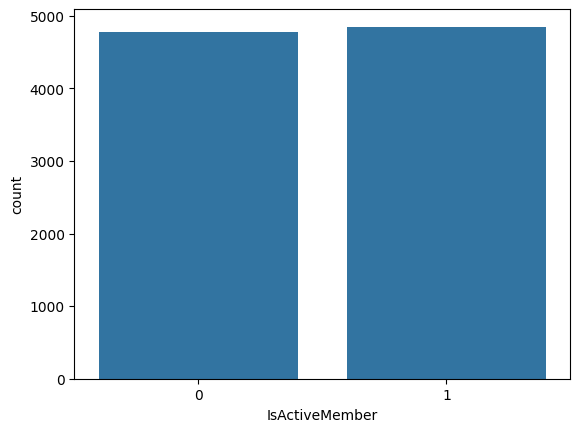

In [ ]:
sns.countplot(x='IsActiveMember',data=df2)

Output Evaluation:IsActiveMember is almost equally distributed.

Analysis of whether the customer has credit card or not.

In [ ]:
card_count=df2['HasCrCard'].value_counts()
card_count

1    6787
0    2840
Name: HasCrCard, dtype: int64

In [ ]:
#PieChart
pie_chart = px.pie(card_count,
                  values=card_count.values,
                  names=card_count.index,
                  color=card_count.index,
                  title='Distribution of whether the customer has credit card or not',
                  labels={'values': 'Frequency', 'names': 'HasCrCard'},
                       hole=.4,)
# Adding text labels
pie_chart.update_traces(textinfo='label+percent', pull=[0.1, 0.1, 0.1, 0.1, 0.1])

# Customizing layout
pie_chart.update_layout(font=dict(size=14, color="black"), height=500,template='plotly',)

pie_chart.show()

HasCrCard are not equally distributed.70% customers has credit card.

## Credit Score Analysis.

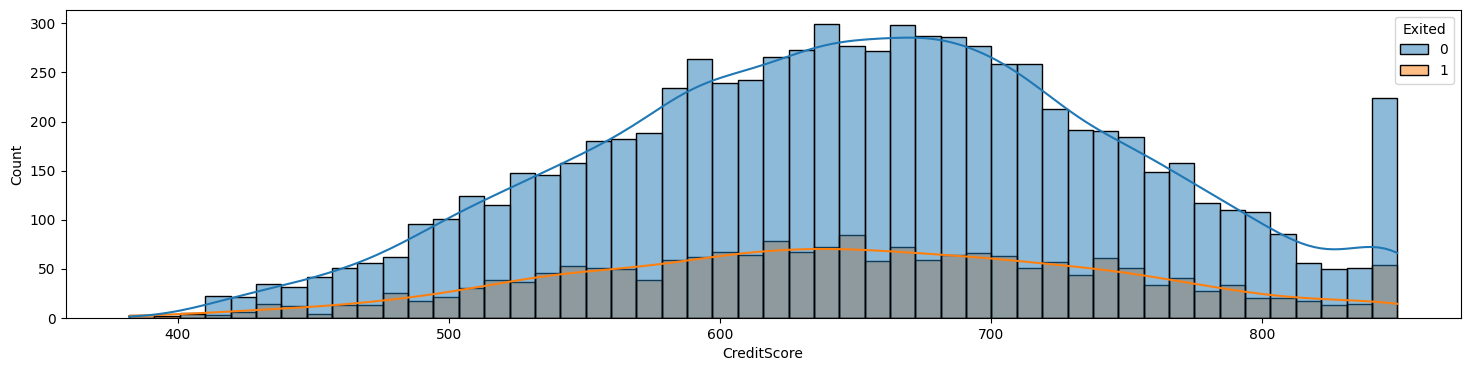

In [ ]:
credit=plt.subplots(figsize=(18, 4))
credit=sns.histplot(data=df2, x='CreditScore', hue="Exited", bins=50, kde=True)
plt.show()

## Age Analysis.

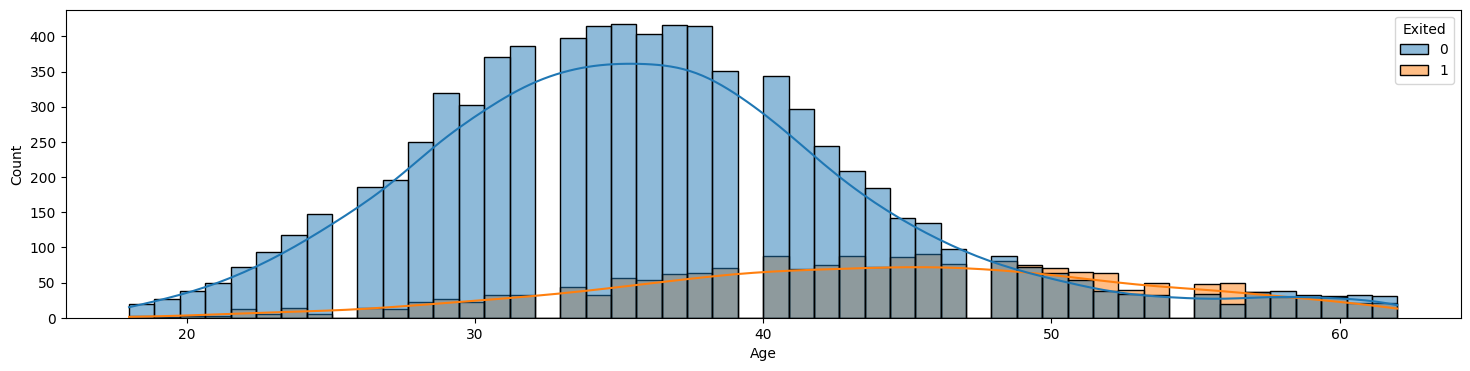

In [ ]:
credit=plt.subplots(figsize=(18, 4))
credit=sns.histplot(data=df2, x='Age', hue="Exited", bins=50, kde=True)
plt.show()

## Balance Analysis.

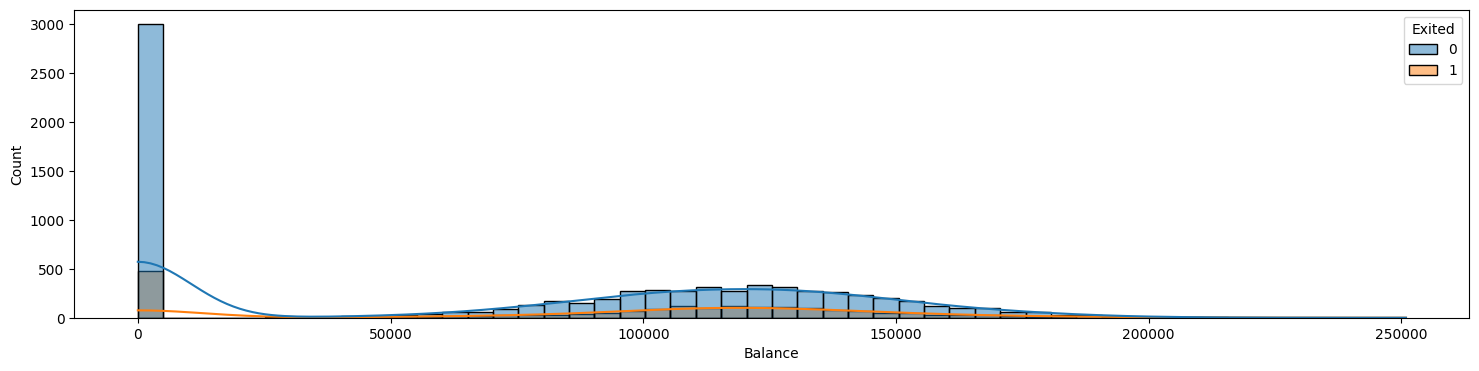

In [ ]:
credit=plt.subplots(figsize=(18, 4))
credit=sns.histplot(data=df2, x='Balance', hue="Exited", bins=50, kde=True)
plt.show()

## Estimated Salary Analysis.

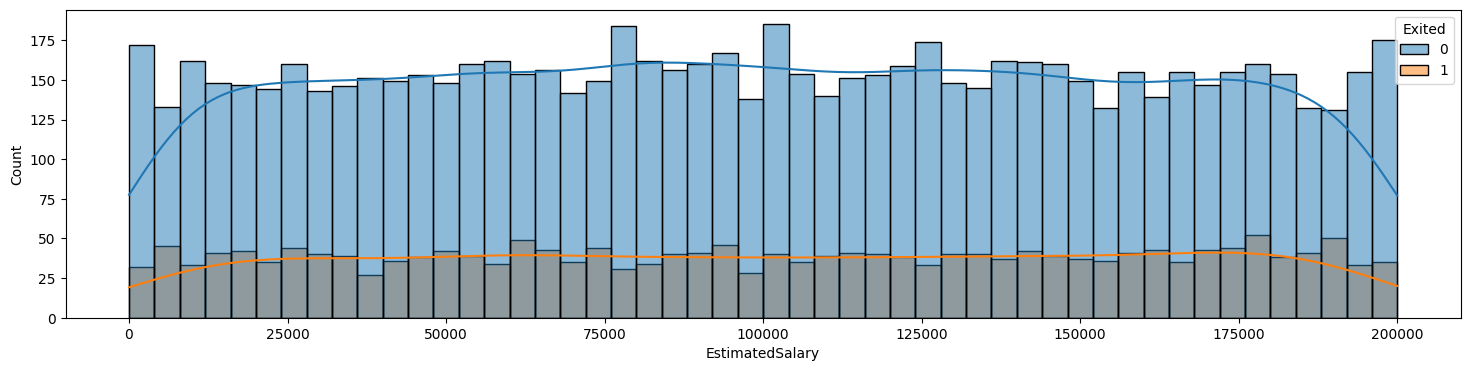

In [ ]:
credit=plt.subplots(figsize=(18, 4))
credit=sns.histplot(data=df2, x='EstimatedSalary', hue="Exited", bins=50, kde=True)
plt.show()

<ipython-input-140-cd3cac4fc0d4>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

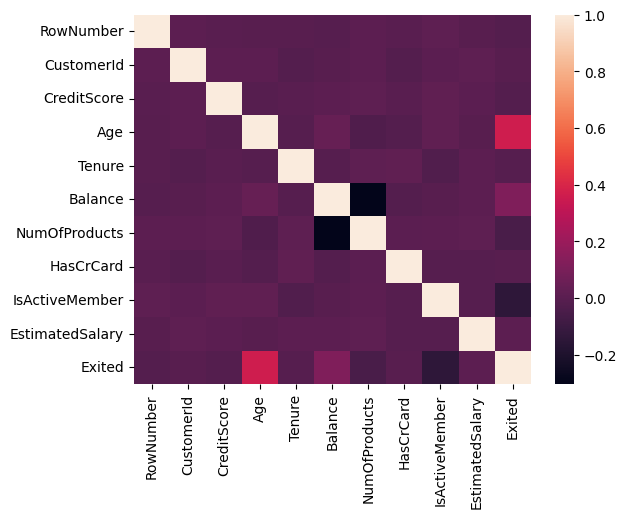

In [ ]:
#Correlation heatmap to visualize the interrelationship between variables.

corr=df2.corr()
corr
sns.heatmap(corr)

## **4.Data Preprocessing.**

In [ ]:
#Get the column names
df2.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
#Removing unwanted columns
df2.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
df2

<ipython-input-142-a3fe7f719b1a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Encoding Categorical variables.

In [ ]:
#Encoding Method1:getdummies
df3=pd.get_dummies(df2[['Geography']],drop_first=True)

In [ ]:
#cocatenate encoded df with orginal df
df4=pd.concat([df2,df3],axis=1)


In [ ]:
#Method2:Label encoding Gender
label=LabelEncoder()
df4['Gender']=label.fit_transform(df4['Gender'])


In [ ]:
#Dropping Geography column
df4.drop(['Geography'],axis=1,inplace=True)
df4

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,1,0


In [ ]:
#Splitting x and y

x=df4.drop(['Exited'], axis=1).values
x

array([[6.1900000e+02, 0.0000000e+00, 4.2000000e+01, ..., 1.0134888e+05,
        0.0000000e+00, 0.0000000e+00],
       [6.0800000e+02, 0.0000000e+00, 4.1000000e+01, ..., 1.1254258e+05,
        0.0000000e+00, 1.0000000e+00],
       [5.0200000e+02, 0.0000000e+00, 4.2000000e+01, ..., 1.1393157e+05,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [7.0900000e+02, 0.0000000e+00, 3.6000000e+01, ..., 4.2085580e+04,
        0.0000000e+00, 0.0000000e+00],
       [7.7200000e+02, 1.0000000e+00, 4.2000000e+01, ..., 9.2888520e+04,
        1.0000000e+00, 0.0000000e+00],
       [7.9200000e+02, 0.0000000e+00, 2.8000000e+01, ..., 3.8190780e+04,
        0.0000000e+00, 0.0000000e+00]])

In [ ]:
y=df4['Exited'].values
y

array([1, 0, 1, ..., 1, 1, 0])

### Handling Imbalances in the data using SMOTE.

Data is imbalanced as we can see from target variable that 80 percent not churned and 20 percent churned.

In [ ]:
from imblearn.over_sampling import SMOTE
x_res,y_res=SMOTE(random_state=2).fit_resample(x,y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.30,random_state=42)
x_train

array([[7.7300000e+02, 0.0000000e+00, 4.0000000e+01, ..., 6.9303150e+04,
        0.0000000e+00, 0.0000000e+00],
       [5.7300000e+02, 1.0000000e+00, 2.8000000e+01, ..., 7.7660030e+04,
        0.0000000e+00, 1.0000000e+00],
       [7.2000000e+02, 1.0000000e+00, 3.3000000e+01, ..., 9.1881290e+04,
        0.0000000e+00, 1.0000000e+00],
       ...,
       [7.0400000e+02, 0.0000000e+00, 4.4000000e+01, ..., 1.5874281e+05,
        0.0000000e+00, 1.0000000e+00],
       [7.8800000e+02, 1.0000000e+00, 3.7000000e+01, ..., 6.6013270e+04,
        0.0000000e+00, 1.0000000e+00],
       [5.5500000e+02, 1.0000000e+00, 2.9000000e+01, ..., 4.7454930e+04,
        0.0000000e+00, 0.0000000e+00]])

In [ ]:
x_test

array([[6.76000000e+02, 0.00000000e+00, 3.40000000e+01, ...,
        4.60382800e+04, 0.00000000e+00, 0.00000000e+00],
       [7.10000000e+02, 1.00000000e+00, 5.40000000e+01, ...,
        1.67023950e+05, 0.00000000e+00, 0.00000000e+00],
       [6.53000000e+02, 1.00000000e+00, 3.10000000e+01, ...,
        2.51830100e+04, 1.00000000e+00, 0.00000000e+00],
       ...,
       [6.88000000e+02, 0.00000000e+00, 4.60000000e+01, ...,
        6.86631000e+03, 1.00000000e+00, 0.00000000e+00],
       [5.79543219e+02, 4.26118895e-01, 4.65738811e+01, ...,
        8.07020255e+04, 0.00000000e+00, 5.73881105e-01],
       [8.19000000e+02, 0.00000000e+00, 3.80000000e+01, ...,
        3.04987000e+04, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test

array([0, 1, 0, ..., 0, 1, 0])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[ 1.36329475, -1.07232491, -0.02565419, ..., -0.54327971,
        -0.69879281, -0.57587098],
       [-0.8515292 ,  1.06318063, -1.37522046, ..., -0.39894971,
        -0.69879281,  1.94259055],
       [ 0.77636641,  1.06318063, -0.81290118, ..., -0.15333719,
        -0.69879281,  1.94259055],
       ...,
       [ 0.59918049, -1.07232491,  0.42420123, ...,  1.00141469,
        -0.69879281,  1.94259055],
       [ 1.52940655,  1.06318063, -0.36304576, ..., -0.60009857,
        -0.69879281,  1.94259055],
       [-1.05086335,  1.06318063, -1.26275661, ..., -0.92061593,
        -0.69879281, -0.57587098]])

In [ ]:
x_test

array([[ 0.28910514, -1.07232491, -0.70043733, ..., -0.9450826 ,
        -0.69879281, -0.57587098],
       [ 0.66562521,  1.06318063,  1.54883979, ...,  1.1444366 ,
        -0.69879281, -0.57587098],
       [ 0.03440038,  1.06318063, -1.03782889, ..., -1.30526978,
         1.58045818, -0.57587098],
       ...,
       [ 0.42199457, -1.07232491,  0.64912894, ..., -1.62161383,
         1.58045818, -0.57587098],
       [-0.77906881, -0.16234565,  0.71366983, ..., -0.34641202,
        -0.69879281,  0.8694265 ],
       [ 1.87270426, -1.07232491, -0.2505819 , ..., -1.21346357,
        -0.69879281, -0.57587098]])

## **5.PREDICTIVE ANALYTICS.**

In this section, we will classify fraudulent and legitimate transactions using three models, including Logistic Regression,Random Forests and Gradient boosting. Accuracy,F1 Score and Precision will be used to check the fit of the model.

In [ ]:
l_model=LogisticRegression()
g_model=GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
r_model=RandomForestClassifier(criterion='entropy')
lst_model=[l_model,g_model,r_model]

Model name is LogisticRegression()
*****************
[[1714  641]
 [ 589 1663]]
Acuracy score is LogisticRegression()
0.7330149772085957
Model name is GradientBoostingClassifier(random_state=42)
*****************
[[2212  143]
 [ 320 1932]]
Acuracy score is GradientBoostingClassifier(random_state=42)
0.8995007597134795
Model name is RandomForestClassifier(criterion='entropy')
*****************
[[2212  143]
 [ 295 1957]]
Acuracy score is RandomForestClassifier(criterion='entropy')
0.9049272845669634


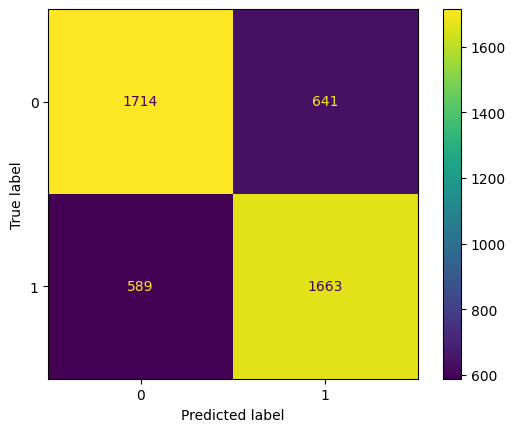

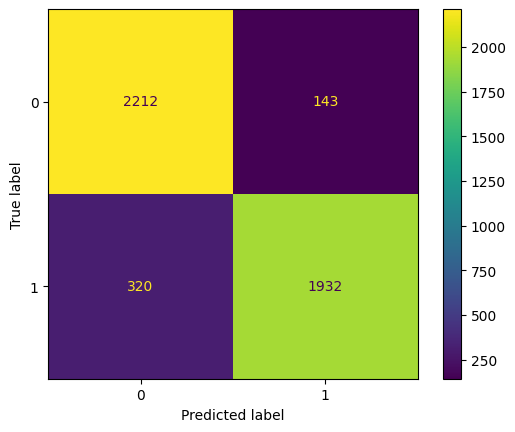

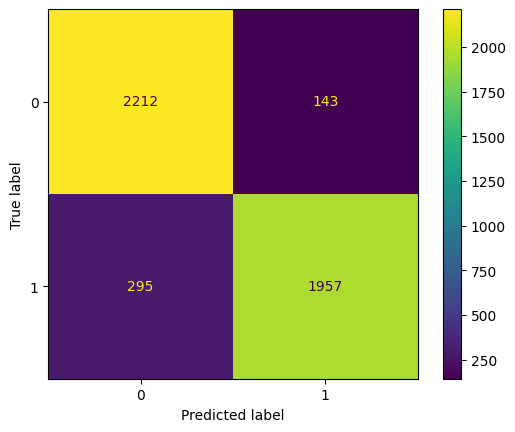

In [ ]:
for i in lst_model:
  print("Model name is",i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print("*****************")
  matrix=confusion_matrix(y_test,y_pred)
  print(matrix)
  label=[0, 1]
  dis=ConfusionMatrixDisplay(matrix,display_labels=label)
  dis.plot()
  print("Acuracy score is",i)
  print(accuracy_score(y_test,y_pred))

In [ ]:
r_model.fit(x_train,y_train)
y_pred1=r_model.predict(x_test)
y_pred1

array([0, 0, 0, ..., 1, 1, 0])

### Model Evaluation.

In [ ]:
print(classification_report(y_pred1, y_test))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      2508
           1       0.87      0.93      0.90      2099

    accuracy                           0.90      4607
   macro avg       0.90      0.91      0.90      4607
weighted avg       0.91      0.90      0.90      4607



## **6. CONCLUSION.**

Out of three classification algorithms performed,

Logistic regression acquired accuracy of 73%

Gradient boosting acquired accuracy of 89% and

Random forest acquired 90% accuracy.

